Precisión promedio del clasificador 1 en validación cruzada: 0.9084
Precisión promedio del clasificador 2 en validación cruzada: 0.9537
El clasificador ENTROPIA es el mejor.
Reglas del mejor árbol de decisión:
|---Laminas_color<=99.50
||---class:p
|---Laminas_color>99.50
||---Esporas_color<=105.50
|||---Tallo_raiz<=80.50
||||---class:e
|||---Tallo_raiz>80.50
||||---class:p
||---Esporas_color>105.50
|||---Laminas_tamaño<=104.00
||||---Esporas_color<=112.50
|||||---class:e
||||---Esporas_color>112.50
|||||---Tallo_raiz<=80.50
||||||---class:e
|||||---Tallo_raiz>80.50
||||||---Habitat<=110.50
|||||||---Tallo_sobre_superficie<=118.00
||||||||---class:p
|||||||---Tallo_sobre_superficie>118.00
||||||||---class:e
||||||---Habitat>110.50
|||||||---class:e
|||---Laminas_tamaño>104.00
||||---Olor<=111.00
|||||---Poblacion<=116.50
||||||---class:p
|||||---Poblacion>116.50
||||||---Habitat<=104.00
|||||||---Moretones<=109.00
||||||||---class:p
|||||||---Moretones>109.00
||||||||---class:e
||||||--

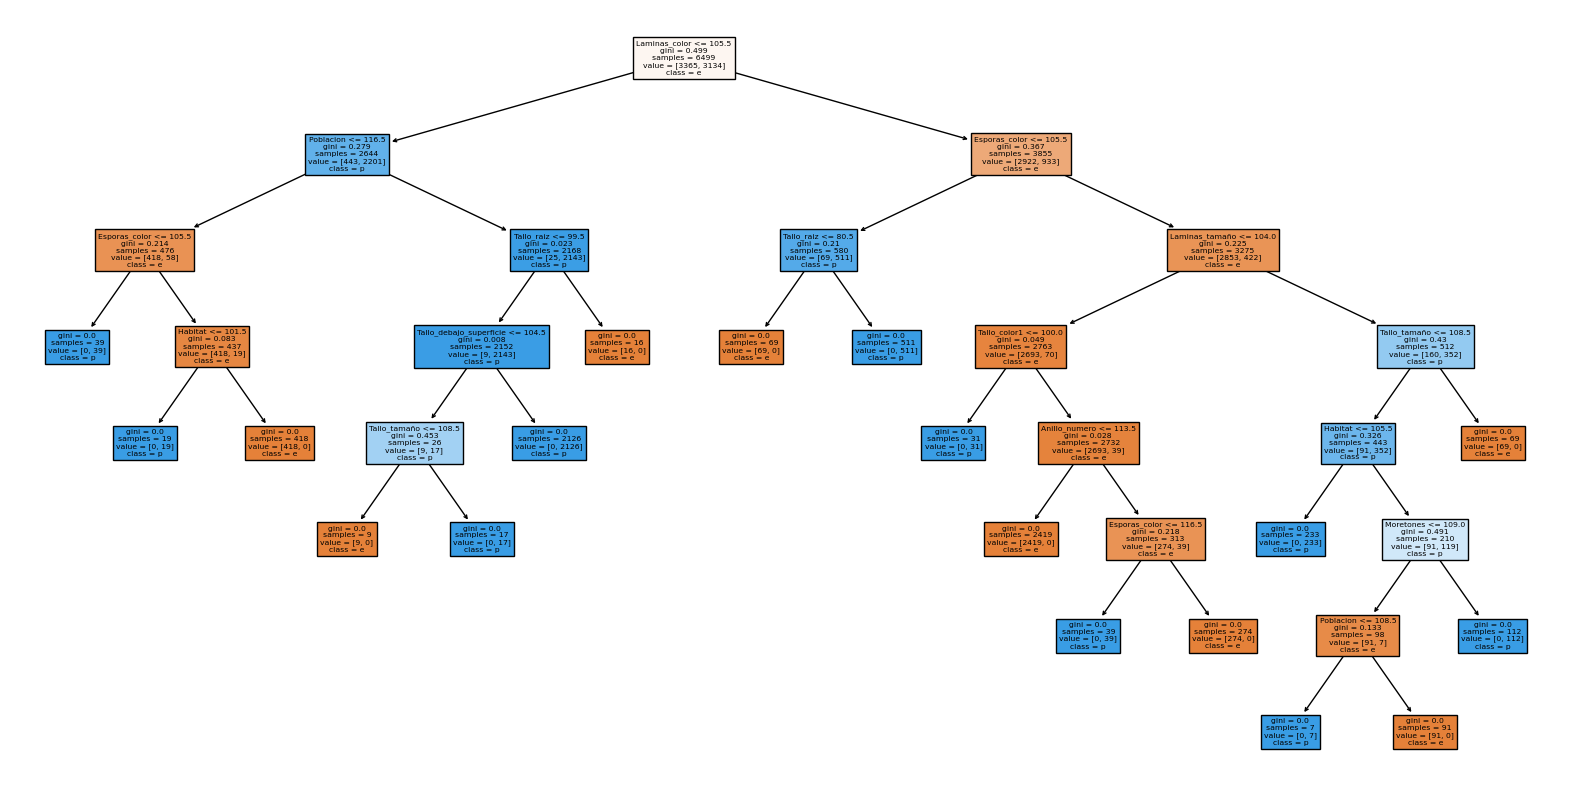

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("Recursos Lab3\Recursos Lab3\Setas\mushrooms.csv")

# Obtener las características (X) y etiquetas (y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Convertir las variables categóricas a códigos ASCII
X_ascii = X.applymap(lambda x: ord(x))
y_ascii = y.map(ord)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_ascii, y_ascii, test_size=0.2, random_state=42)

# Crear clasificador con criterio de entropía
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)

# Crear clasificador con criterio de Gini
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)

# Realizar validación cruzada en ambos clasificadores
scores1 = cross_val_score(clf_gini, X_ascii, y, cv=5)
scores2 = cross_val_score(clf_entropy, X_ascii, y, cv=5)

# Calcular la precisión promedio en validación cruzada para cada clasificador
mean_score1 = scores1.mean()
mean_score2 = scores2.mean()

print("Precisión promedio del clasificador 1 en validación cruzada: {:.4f}".format(mean_score1))
print("Precisión promedio del clasificador 2 en validación cruzada: {:.4f}".format(mean_score2))

# Comparar los resultados y determinar el mejor clasificador
if mean_score1 > mean_score2:
    print("El clasificador GINI es el mejor.")
    best_clf= clf_gini
else:
    print("El clasificador ENTROPIA es el mejor.")
    best_clf=clf_entropy



# Obtener las reglas del mejor árbol de decisión
rules = export_text(best_clf, feature_names=X.columns.tolist())

# Convertir los códigos ASCII de vuelta a letras en las reglas del árbol de decisión
rules_ascii_to_char = []
for line in rules.split("\n"):
    line_char = "".join([chr(int(code)) if code.isdigit() else code for code in line.split()])
    rules_ascii_to_char.append(line_char)

rules_ascii_to_char = "\n".join(rules_ascii_to_char)
print("Reglas del mejor árbol de decisión:")
print(rules_ascii_to_char)

# Dibujar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf_gini, feature_names=X.columns.tolist(), class_names=[chr(i) for i in clf_gini.classes_], filled=True)
plt.show()